In [ ]:
!pip install wandb


In [ ]:
import wandb

In [ ]:
!wandb login

wandb: Currently logged in as: newton14 (newton14-usiu). Use `wandb login --relogin` to force relogin


In [ ]:
wandb.init(project="phishin detection using logistic regression")
config = wandb.config
config.learning_rate = 0.01
config.epochs = 10


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
wandb =pd.read_csv("/content/urlset.csv",encoding='latin-1',on_bad_lines='skip')

In [ ]:
wandb.head()

,domain,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,10000000,1.0,0.0,18.0,107.611111,107.277778,0.0,0.0,0.0,0.0,0.8,0.795729,1.0
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,10000000,0.0,0.0,11.0,150.636364,152.272727,0.0,0.0,0.0,0.0,0,0.768577,1.0
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,10000000,0.0,0.0,14.0,73.500000,72.642857,0.0,0.0,0.0,0.0,0,0.726582,1.0
3,mail.printakid.com/www.online.americanexpress....,10000000,0.0,0.0,6.0,562.000000,590.666667,0.0,0.0,0.0,0.0,0,0.85964,1.0
4,thewhiskeydregs.com/wp-content/themes/widescre...,10000000,0.0,0.0,8.0,29.000000,24.125000,0.0,0.0,0.0,0.0,0,0.748971,1.0


In [ ]:
wandb.shape

(96005, 14)

In [ ]:
wandb.sample(40)

In [ ]:
wandb.info()

In [ ]:
wandb.describe(include='all')
wandb.columns
wandb.isnull().sum()

In [ ]:
X=wandb.drop(columns=['label','domain'])
y =wandb['label']

In [ ]:
X

In [ ]:
y

In [ ]:
for col in X.columns:
  if X[col].dtype == 'object':
    try:
      X[col] = pd.to_numeric(X[col], errors='coerce')
    except:
      pass

X.fillna(X.mean(), inplace=True)
X.isnull().sum()

ranking          0
mld_res          0
mld.ps_res       0
card_rem         0
ratio_Rrem       0
ratio_Arem       0
jaccard_RR       0
jaccard_RA       0
jaccard_AR       0
jaccard_AA       0
jaccard_ARrd     0
jaccard_ARrem    0
dtype: int64

In [ ]:
for i in range(len(y)):
  if y.dtype == 'object':
    try:
      y.iloc[i] = pd.to_numeric(y.iloc[i], errors='coerce')
    except:
      pass

y.fillna(y.mean(), inplace=True)
y.isnull().sum()

0

<Axes: >

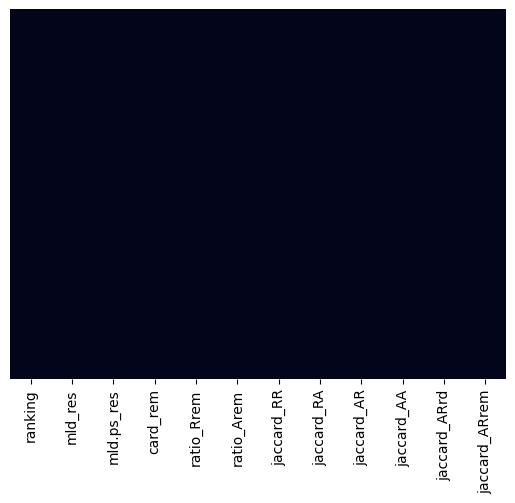

In [ ]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='rocket')

<Axes: >

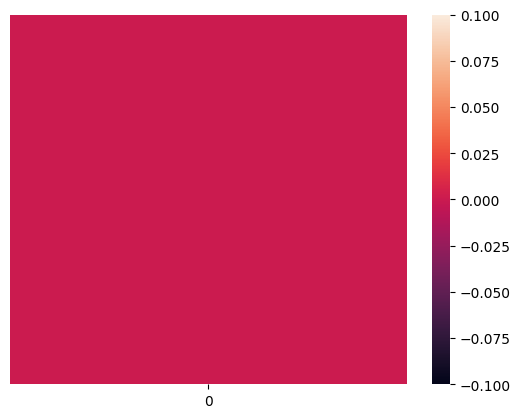

In [ ]:
sns.heatmap(y.isnull().values.reshape(-1,1),yticklabels=False, cbar=True, cmap='rocket')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
25581,10000000.0,0.0,0.0,9.0,177.888889,177.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.773156
27232,10000000.0,0.0,0.0,2.0,227.500000,235.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.844622
19936,6089.0,0.0,0.0,10.0,165.100000,164.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.773290
25399,10000000.0,0.0,0.0,1.0,13.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.785714
27965,10000000.0,0.0,0.0,1.0,31.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.647059
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,10000000.0,1.0,1.0,5.0,99.000000,96.600000,0.000000,0.000000,0.000000,0.000000,0.785714,0.768535
54886,136672.0,0.0,0.0,1.0,111.000000,113.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.777778
76820,138945.0,1.0,0.0,1.0,24.000000,24.000000,0.027027,0.055556,0.033333,0.068966,0.500000,0.655172
860,10000000.0,0.0,0.0,7.0,40.142857,36.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.717949


In [ ]:
X_test

,ranking,mld_res,mld.ps_res,card_rem,ratio_Rrem,ratio_Arem,jaccard_RR,jaccard_RA,jaccard_AR,jaccard_AA,jaccard_ARrd,jaccard_ARrem
88609,10000000.0,1.0,0.0,3.0,164.666667,179.666667,0.00000,0.001808,0.000000,0.001815,0.866667,0.750847
34507,10000000.0,0.0,0.0,5.0,87.400000,92.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.853306
53443,10000000.0,1.0,1.0,1.0,8.000000,7.000000,0.00000,0.000000,0.000000,0.000000,0.733333,0.500000
18455,10000000.0,0.0,0.0,10.0,151.300000,148.800000,0.00000,0.000000,0.000000,0.000000,0.000000,0.759086
58808,13648.0,1.0,0.0,3.0,105.666667,111.333333,0.00289,0.005525,0.002994,0.005714,0.600000,0.699739
...,...,...,...,...,...,...,...,...,...,...,...,...
70644,73087.0,1.0,1.0,1.0,537.000000,577.000000,0.01259,0.013445,0.005396,0.006723,0.846154,0.823241
47174,10000000.0,0.0,0.0,7.0,165.571429,164.571429,0.00000,0.000000,0.000000,0.000000,0.000000,0.812549
66208,14969.0,1.0,0.0,1.0,265.000000,268.000000,0.00000,0.000000,0.000000,0.000000,0.916667,0.850694
57370,6655.0,1.0,1.0,5.0,138.400000,152.400000,0.00000,0.002457,0.000000,0.002448,0.761905,0.764563


In [ ]:
y_train

25581    1.0
27232    1.0
19936    1.0
25399    1.0
27965    1.0
        ... 
6265     1.0
54886    0.0
76820    0.0
860      1.0
15795    1.0
Name: label, Length: 76804, dtype: float64

In [ ]:
y_test

88609    0.0
34507    1.0
53443    0.0
18455    1.0
58808    0.0
        ... 
70644    0.0
47174    1.0
66208    0.0
57370    0.0
56067    0.0
Name: label, Length: 19201, dtype: float64

In [ ]:
from sklearn.linear_model import LogisticRegression
for epoch in range(config.epochs):
  logmodel = LogisticRegression()
  threshold =0.5
  y_train=(y_train>threshold).astype(int)
  y_test=(y_test>threshold).astype(int)
  logmodel.fit(X_train,y_train)
  prediction = logmodel.predict(X_test)

In [ ]:
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test

88609    0
34507    1
53443    0
18455    1
58808    0
        ..
70644    0
47174    1
66208    0
57370    0
56067    0
Name: label, Length: 19201, dtype: int64

In [ ]:
from sklearn.metrics import auc, accuracy_score, classification_report,log_loss,confusion_matrix

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9551
           1       0.50      1.00      0.67      9650

    accuracy                           0.50     19201
   macro avg       0.25      0.50      0.33     19201
weighted avg       0.25      0.50      0.34     19201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Axes(0.125,0.11;0.62x0.77)


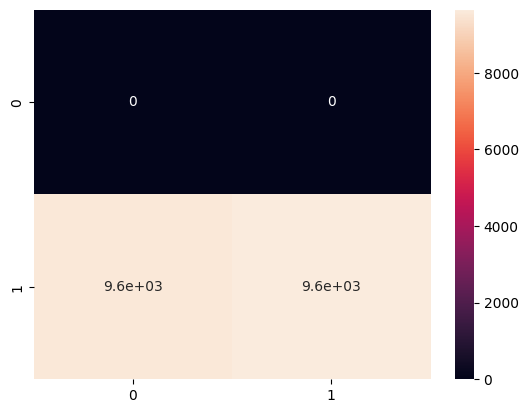

In [ ]:
print(sns.heatmap(confusion_matrix(prediction,y_test),annot=True))

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

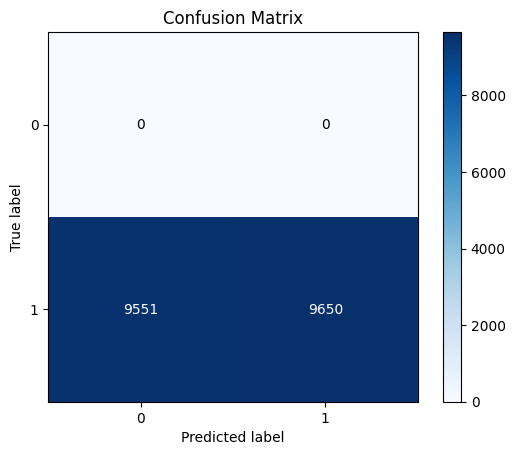

In [ ]:
skplt.metrics.plot_confusion_matrix(prediction,y_test)
plt.show()

In [ ]:
train_accuracy= accuracy_score(y_train,logmodel.predict(X_train))
test_accuracy= accuracy_score(y_test,prediction)

print("Train Accuracy : ",train_accuracy)
print("Test Accuracy : ",test_accuracy	)

Train Accuracy :  0.49813811780636424
Test Accuracy :  0.5025779907296495


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
test_auc=roc_auc_score(y_test,prediction)
print("Test AUC : ",test_auc)

Test AUC :  0.5


In [ ]:
wandb.log({'epoch': epoch+1,'train_accuracy':train_accuracy,'test_accuracy':test_accuracy,'test_auc':test_auc})
wandb.finish()

epoch,▁
test_accuracy,▁
test_auc,▁
train_accuracy,▁
epoch,10
test_accuracy,0.50258
test_auc,0.5
train_accuracy,0.49814
